# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

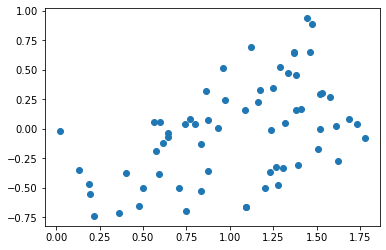

In [4]:
plt.scatter(x.T[0], y)

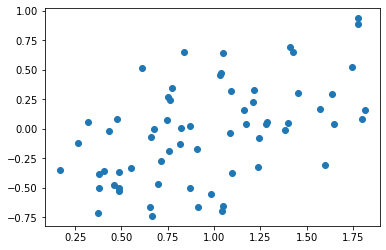

In [5]:
plt.scatter(x.T[1], y)

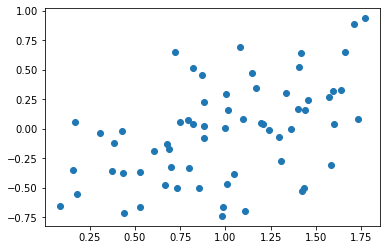

In [6]:
plt.scatter(x.T[2], y)

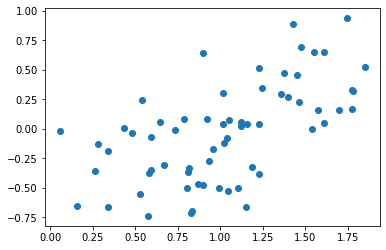

In [7]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [11]:
left = np.linalg.inv(np.dot(x.T,x))
right = np.dot(y.T, x)
beta = np.dot(left, right)
beta

array([ 0.13502912,  0.20671088,  0.09167338,  0.32939318, -0.79474582])

In [9]:
np.linalg.lstsq(x, y)[0]

<ipython-input-9-689fae2f6f3b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(x, y)[0]


array([ 0.13502912,  0.20671088,  0.09167338,  0.32939318, -0.79474582])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

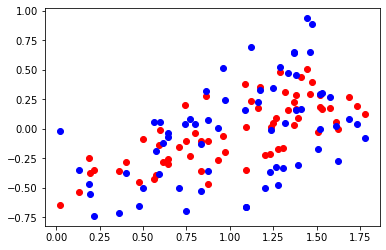

In [12]:
pred = np.dot(x, beta)

plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

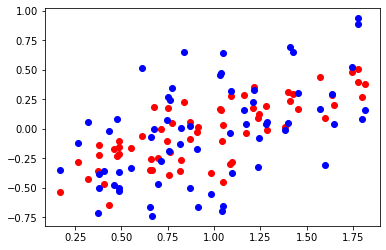

In [13]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

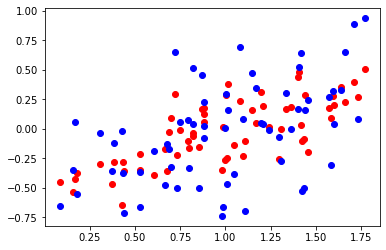

In [14]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

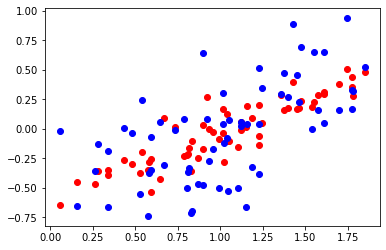

In [15]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [18]:
import pandas as pd
import numpy as np
credit = pd.read_csv('C:/Users/caprile/Desktop/mlnn-personal/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [38]:
columns = ['Income', 'Limit', 'Age', 'Education']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 1.10000e+01, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 1.50000e+01, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 1.10000e+01, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.20000e+01, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 1.30000e+01, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 7.00000e+00, 1.00000e+00]])

In [39]:
Y = credit['Rating']
Y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [40]:
left = np.linalg.inv(np.dot(X.T,X))
right = np.dot(Y.T, X)
beta = np.dot(left, right)
beta

array([ 1.74813021e-02,  6.65859593e-02,  2.04045669e-02, -3.28829977e-01,
        4.21119381e+01])

In [41]:
np.linalg.lstsq(X, Y)[0]

<ipython-input-41-5f5e83db50f9>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X, Y)[0]


array([ 1.74813021e-02,  6.65859593e-02,  2.04045669e-02, -3.28829977e-01,
        4.21119381e+01])

In [42]:
pred = np.dot(X, beta)

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

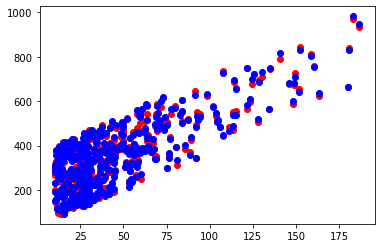

In [43]:
plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], Y, c='b')

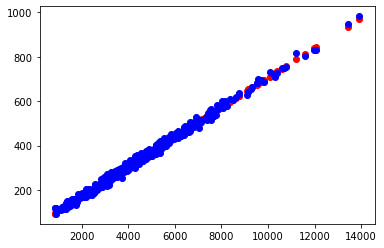

In [44]:
plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], Y, c='b')

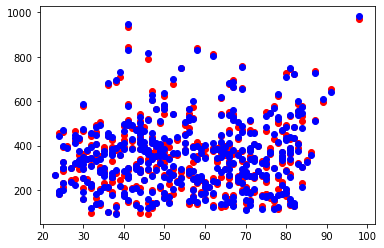

In [45]:
plt.scatter(X.T[2], pred, c='red')
plt.scatter(X.T[2], Y, c='b')

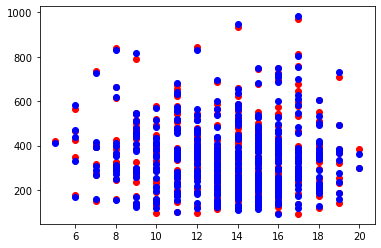

In [46]:
plt.scatter(X.T[3], pred, c='red')
plt.scatter(X.T[3], Y, c='b')